In [1]:
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [8]:
from torch.utils.data import DataLoader
import numpy as np
import pandas as pd
import collections

from utils import _get_logger, collate_fn
from utils import visualize_boxes_and_labels_on_image_array

pd.set_option("display.max_colwidth", None)
logger = _get_logger("000_datasets.ipynb")

In [9]:
logger.info("Testing Dataset Formats: ")

[10/03 23:33:03 000_datasets.ipynb]: Testing Dataset Formats: 


## COCO:

In [10]:
# Utilities to load in the COCO dataset
from utils.coco import get_coco, get_coco_api_from_dataset, CocoEvaluator
from utils.coco.coco_transforms import RandomHorizontalFlip, ToTensor, Compose

In [11]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

In [12]:
root = "/Users/ayushman/Desktop/Datasets/coco/" # coco dataset root-drectory
tfms = Compose([ToTensor(), RandomHorizontalFlip(prob=0.5)]) # transformations for the COCO-dataset

In [13]:
# coco train dataset
coco_trn_ds = get_coco(root=root, image_set="train", transforms=tfms)

loading annotations into memory...
Done (t=14.89s)
creating index...
index created!


In [14]:
# construct dataloader from the Dataset
coco_trn_dl = DataLoader(coco_trn_ds, batch_size=5, collate_fn=collate_fn, num_workers=3)

bs = next(iter(coco_trn_dl)) # grab one batch
image, target, idx = bs # unpack batch

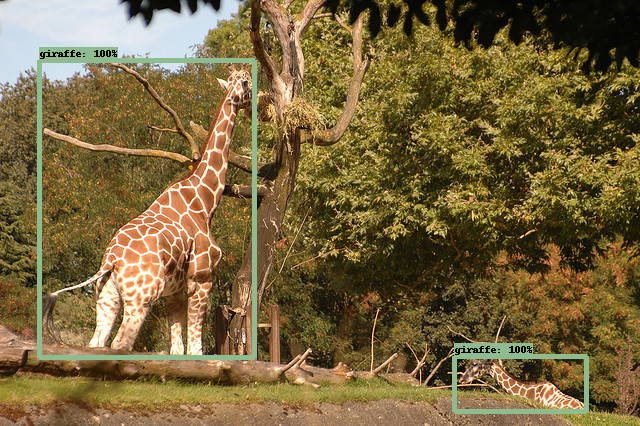

In [15]:
# Draw the bounding boxes over the image
im = visualize_boxes_and_labels_on_image_array(
    image=image[1].permute(1, 2, 0).numpy(),
    boxes=target[1]['boxes'].numpy(),
    scores=None,
    classes=target[1]['labels'].numpy(),
    label_map=COCO_INSTANCE_CATEGORY_NAMES,
)
# view image
im

In [16]:
# coco validation dataset
tfms = Compose([ToTensor()])
coco_val_ds = get_coco(root=root, image_set="val", transforms=tfms)

loading annotations into memory...
Done (t=0.41s)
creating index...
index created!


In [17]:
dl = DataLoader(coco_val_ds, batch_size=5, collate_fn=collate_fn, num_workers=3)
bs = next(iter(dl)) # grab one batch
image, target, idx = bs # unpack batch

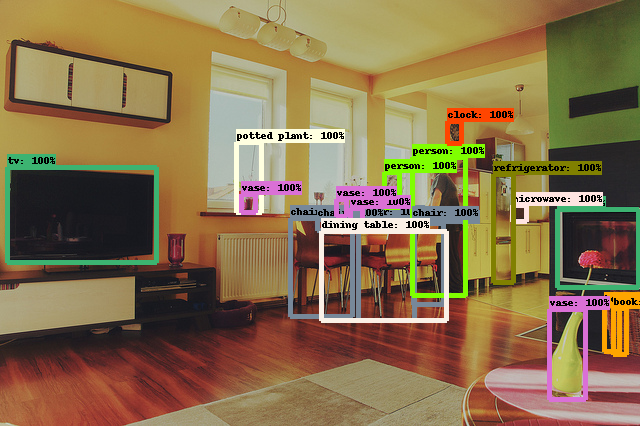

In [18]:
im = visualize_boxes_and_labels_on_image_array(
    image=image[0].permute(1, 2, 0).numpy(),
    boxes=target[0]['boxes'].numpy(),
    scores=None,
    classes=target[0]['labels'].numpy(),
    label_map=COCO_INSTANCE_CATEGORY_NAMES,
)

im

In [19]:
# convert dataset to coco format, 
# this is used for evaluations using COCO-API
coco = get_coco_api_from_dataset(dl.dataset)
evaluator = CocoEvaluator(coco, ["bbox"])

In [23]:
# evaluator.update()
# evaluator.accumulate()
# evaluator.summarize()

## PASCAL-VOC :

In [24]:
# Utilities to load in the Pascal dataset
from utils.pascal import get_pascal
from utils.pascal.pascal_transforms import compose_transforms
import albumentations as A

In [25]:
# we can use albumentation transformations with data in voc-csv format
# add the transformations as a list to compose_transforms functions
tfms = compose_transforms([A.HorizontalFlip(p=0.5)])

In [26]:
# paths to the voc dataset images and annotations
test_im_pth = "/Users/ayushman/Desktop/Datasets/voc2007/pascal_voc_2007_test/Images/"
test_ann_pth = "/Users/ayushman/Desktop/Datasets/voc2007/pascal_voc_2007_test/Annotations/"

train_im_pth = "/Users/ayushman/Desktop/Datasets/voc2007/pascal_voc_2007_train_val/Images/"
train_ann_pth = "/Users/ayushman/Desktop/Datasets/voc2007/pascal_voc_2007_train_val/Annotations/"

In [27]:
# generate csv files for the train and validation datasets
trn_ds  = get_pascal(train_ann_pth, train_im_pth, "train", transforms=tfms)
test_ds = get_pascal(test_ann_pth, test_im_pth,  "test",  transforms=tfms)

[10/03 23:35:10 utils.pascal.pascal_utils]: DataFrame generated is saved to pascal_train.csv
[10/03 23:35:12 utils.pascal.pascal_utils]: DataFrame generated is saved to pascal_test.csv


In [28]:
df = pd.read_csv("pascal_train.csv")
df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax,labels
0,/Users/ayushman/Desktop/Datasets/voc2007/pascal_voc_2007_train_val/Images/007826.jpg,500,375,diningtable,80,217,320,273,11
1,/Users/ayushman/Desktop/Datasets/voc2007/pascal_voc_2007_train_val/Images/007826.jpg,500,375,chair,197,193,257,326,9
2,/Users/ayushman/Desktop/Datasets/voc2007/pascal_voc_2007_train_val/Images/007826.jpg,500,375,chair,139,184,185,231,9
3,/Users/ayushman/Desktop/Datasets/voc2007/pascal_voc_2007_train_val/Images/007826.jpg,500,375,chair,258,180,312,314,9
4,/Users/ayushman/Desktop/Datasets/voc2007/pascal_voc_2007_train_val/Images/007826.jpg,500,375,chair,10,195,93,358,9


In [ ]:
# PASCAL_INSTANCE_CATEGORY_NAMES = [
#     '__background__', 'aeroplane', 'bicycle', 'bird', 'boat', 
#     'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 
#     'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 
#     'sofa', 'train', 'tvmonitor'
# ]

In [29]:
# Create category list for PASCAL_DATASET
cs = df["class"].unique()
ls = df["labels"].unique()

PASCAL_INSTANCE_CATEGORY_NAMES = list(np.zeros(len(ls) + 1))

for i, x in enumerate(ls):  PASCAL_INSTANCE_CATEGORY_NAMES[x] = cs[i]

# Add the background class to the Category names
# Since the labels start from the 1, we set the 0 value to be the 
# background class
PASCAL_INSTANCE_CATEGORY_NAMES[0] = "__background__"
print(PASCAL_INSTANCE_CATEGORY_NAMES)

['__background__', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']


In [30]:
dl = DataLoader(trn_ds, collate_fn=collate_fn, batch_size=5)
bs = next(iter(dl)) # grab one batch
image, target, idx = bs # unpack batch

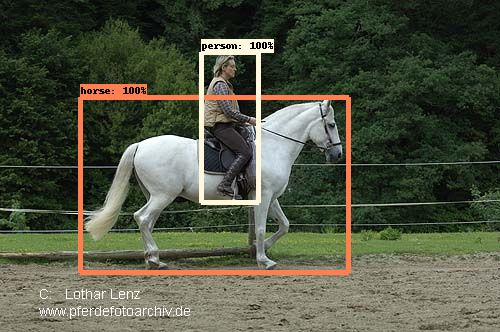

In [31]:
im = visualize_boxes_and_labels_on_image_array(
    image=image[1].permute(1, 2, 0).numpy(),
    boxes=target[1]['boxes'].numpy(),
    scores=None,
    classes=target[1]['labels'].numpy(),
    label_map=PASCAL_INSTANCE_CATEGORY_NAMES,
)

im

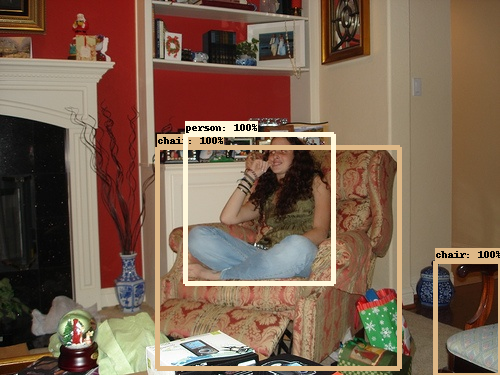

In [32]:
dl = DataLoader(test_ds, collate_fn=collate_fn, batch_size=8)
bs = next(iter(dl)) # grab one batch
image, target, idx = bs # unpack batch

im = visualize_boxes_and_labels_on_image_array(
    image=image[3].permute(1, 2, 0).numpy(),
    boxes=target[3]['boxes'].numpy(),
    scores=None,
    classes=target[3]['labels'].numpy(),
    label_map=PASCAL_INSTANCE_CATEGORY_NAMES,
)

im

In [33]:
# convert dataset to coco format, 
# this is used for evaluations using COCO-API
coco = get_coco_api_from_dataset(dl.dataset)
evaluator = CocoEvaluator(coco, ["bbox"])

creating index...
index created!


In [34]:
# evaluator.update()
# evaluator.accumulate()
# evaluator.summarize()